<a href="https://www.kaggle.com/code/eavprog/abscur-pred-one-one?scriptVersionId=149431885" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Прогнозирование абсолютного курса одной валюты с использованием всех имеющихся

# Загрузка библиотек

In [1]:
!pip install fedot==0.6.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 63.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 41.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 3.3 MB/s eta 0:00:00
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15079 sha256=215528581f4030b5f1e8bc744d2c5b3101bf64fdc4f201d73343cbc0070e7b99
  Stored in directory: /root

In [2]:
# Plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

import warnings
warnings.filterwarnings('ignore')

# Prerocessing for FEDOT
from fedot.core.data.data import InputData
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

from fedot.core.data.data_split import train_test_data_setup
from fedot.core.data.multi_modal import MultiModalData

# FEDOT 
from fedot.core.pipelines.pipeline import Pipeline
from fedot.api.main import Fedot

import logging
logging.raiseExceptions = False

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

import time

# Импорт данных

In [4]:
abscur_data = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col='Date')
abscur_data

,AUD,HKD,JPY,SEK,USD,CAD,CHF,EUR,CNY,CZK,...,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-24,12.159123,1.818943,0.119266,1.897159,14.116446,12.508005,14.600489,17.559034,2.298456,0.637020,...,0.139147,4.185131,3.876547,3.966074,3.762880,0.430117,6.332517,0.455737,0.937316,0.000663
2014-11-25,12.044274,1.819092,0.119666,1.901584,14.118616,12.536687,14.638259,17.611218,2.300944,0.638980,...,0.138826,4.219929,3.877143,3.979317,3.763559,0.430446,6.363177,0.456440,0.940802,0.000661
2014-11-26,12.045147,1.818022,0.119895,1.907480,14.106437,12.535026,14.672645,17.641778,2.297993,0.640031,...,0.138706,4.223105,3.874862,3.999897,3.759411,0.430862,6.384158,0.456593,0.942125,0.000660
2014-11-27,12.057459,1.823927,0.119974,1.903085,14.143677,12.473238,14.664537,17.627140,2.303418,0.638720,...,0.139073,4.218970,3.885092,3.987279,3.769335,0.431604,6.411458,0.457798,0.944612,0.000662
2014-11-28,12.071798,1.828934,0.119480,1.908166,14.198605,12.428579,14.706606,17.675403,2.311027,0.640488,...,0.139819,4.241555,3.899966,3.997355,3.783470,0.432489,6.396344,0.458315,0.948534,0.000667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31,13.841431,2.786765,0.144116,1.957706,21.831496,15.742543,24.039145,23.087372,2.982847,0.941125,...,0.077609,5.194265,5.997664,4.650045,5.822509,0.604918,0.771829,0.673666,0.596978,0.000896
2023-11-01,13.963441,2.786706,0.144543,1.954037,21.801539,15.751715,24.058630,23.074436,2.982307,0.935547,...,0.077379,5.162571,5.989434,4.639119,5.811574,0.603252,0.770141,0.672742,0.596159,0.000895
2023-11-02,13.976347,2.776042,0.144387,1.954017,21.719394,15.801605,24.010710,23.069321,2.969415,0.944167,...,0.076752,5.190439,5.966866,4.645462,5.792765,0.604660,0.766836,0.670207,0.593913,0.000892


# Цикл


======================================== KWD ========================================
2023-11-05 15:49:42,028 - Unknown integration target: 
2023-11-05 15:49:49,745 - Unknown integration target: 
2023-11-05 15:49:57,757 - Unknown integration target: 
2023-11-05 15:50:05,334 - Unknown integration target: 
2023-11-05 15:50:13,037 - Unknown integration target: 
2023-11-05 15:50:29,911 - Unknown integration target: 
2023-11-05 15:50:46,664 - Unknown integration target: 
2023-11-05 15:51:03,710 - Unknown integration target: 
2023-11-05 15:51:05,930 - Unknown integration target: 
2023-11-05 15:51:05,933 - Unknown integration target: 
2023-11-05 15:51:18,583 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 261.8 MiB, max: 264.2 MiB
2023-11-05 15:51:18,589 - ApiComposer - Initial pipeline was fitted in 10.3 sec.
2023-11-05 15:51:18,595 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
202

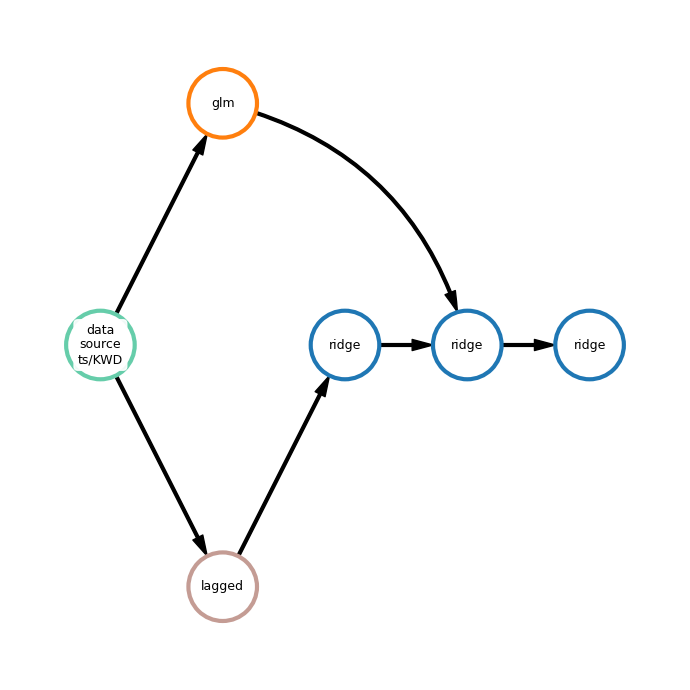

Pipeline structure:
{'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/KWD, ridge, lagged]}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/KWD - {}
ridge - {}
lagged - {'window_size': 10}
[70.75860249 70.75797555 70.75812197 70.76032034 70.76371863 70.76258106
 70.75911126 70.7589556  70.76321147 70.76977464]
{'mae': 0.294, 'mape': 0.004}


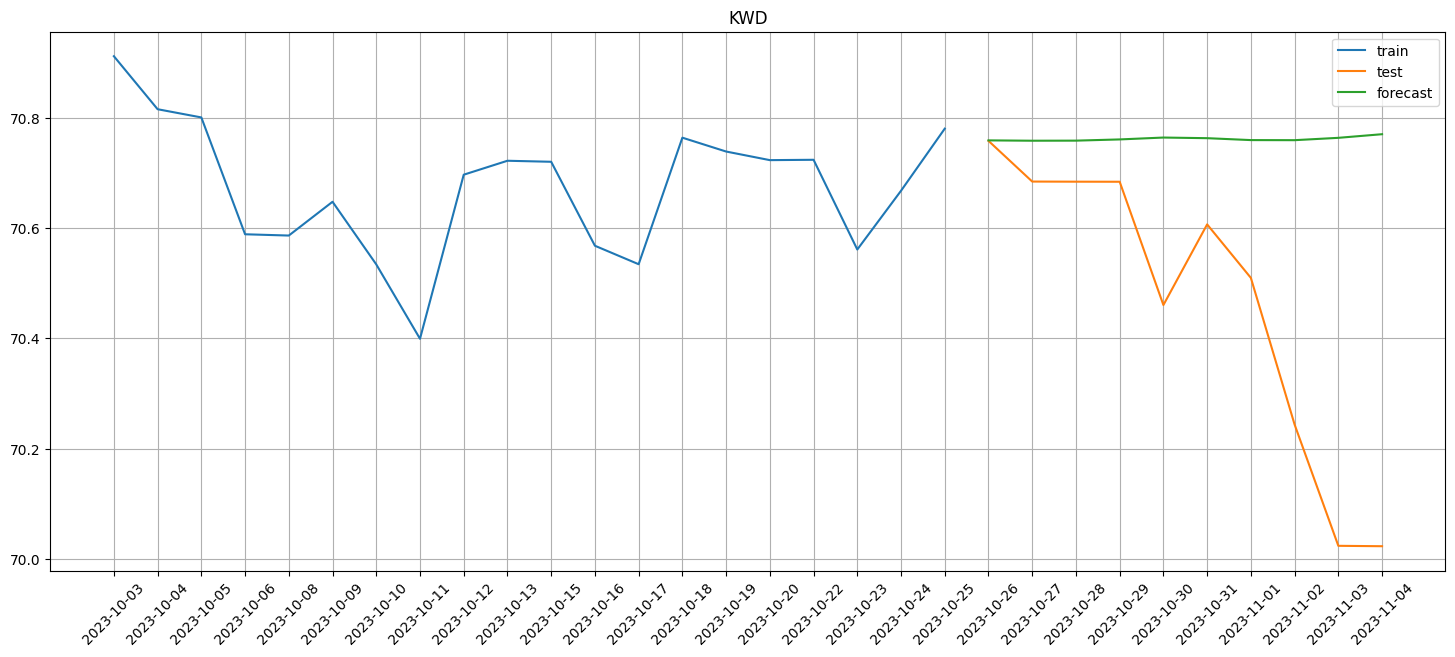


======================================== ILS ========================================
2023-11-05 15:53:00,904 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.3 MiB, max: 3.7 MiB
2023-11-05 15:53:00,913 - ApiComposer - Initial pipeline was fitted in 15.8 sec.
2023-11-05 15:53:00,919 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-05 15:53:00,959 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 1 min. Set of candidate models: ['ar', 'cut', 'polyfit', 'ts_naive_average', 'diff_filter', 'locf', 'glm', 'ets', 'lagged', 'gaussian_filter', 'smoothing', 'sparse_lagged', 'ransac_lin_reg', 'normalization', 'ar', 'lasso', 'cut', 'linear', 'scaling', 'polyfit', 'gaussian_filter', 'locf', 'glm', 'lagged', 'diff_filter', 'ridge', 'pca', 'sgdr', 'ransac_non_lin_reg', 'dtreg', 'ts_naive_average', 'rfr', 'adareg', 'ets', 'sparse_lagged', 'smoothing'].
2023-11-05

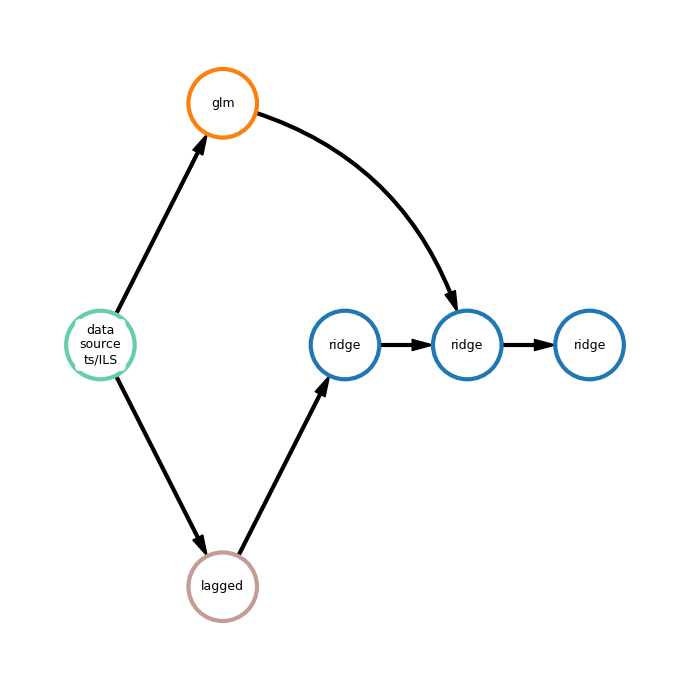

Pipeline structure:
{'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/ILS, ridge, lagged]}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/ILS - {}
ridge - {}
lagged - {'window_size': 10}
[5.41527995 5.41564939 5.41599939 5.41635426 5.416687   5.4169822
 5.41727659 5.41756972 5.41785581 5.41816103]
{'mae': 0.049, 'mape': 0.009}


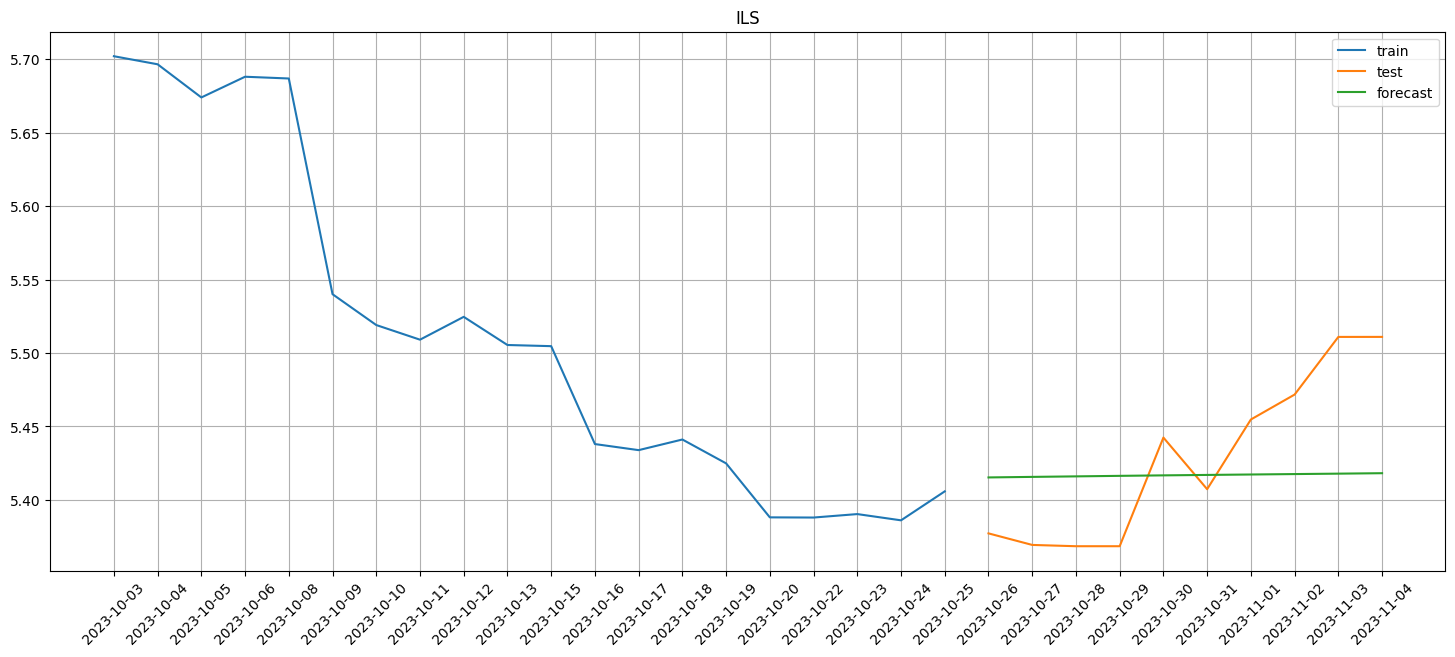


======================================== UAH ========================================
2023-11-05 15:54:58,833 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.3 MiB, max: 3.7 MiB
2023-11-05 15:54:58,849 - ApiComposer - Initial pipeline was fitted in 16.0 sec.
2023-11-05 15:54:58,860 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-05 15:54:58,889 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 1 min. Set of candidate models: ['ar', 'cut', 'polyfit', 'ts_naive_average', 'diff_filter', 'locf', 'glm', 'ets', 'lagged', 'gaussian_filter', 'smoothing', 'sparse_lagged', 'ransac_lin_reg', 'normalization', 'ar', 'lasso', 'cut', 'linear', 'scaling', 'polyfit', 'gaussian_filter', 'locf', 'glm', 'lagged', 'diff_filter', 'ridge', 'pca', 'sgdr', 'ransac_non_lin_reg', 'dtreg', 'ts_naive_average', 'rfr', 'adareg', 'ets', 'sparse_lagged', 'smoothing'].
2023-11-05

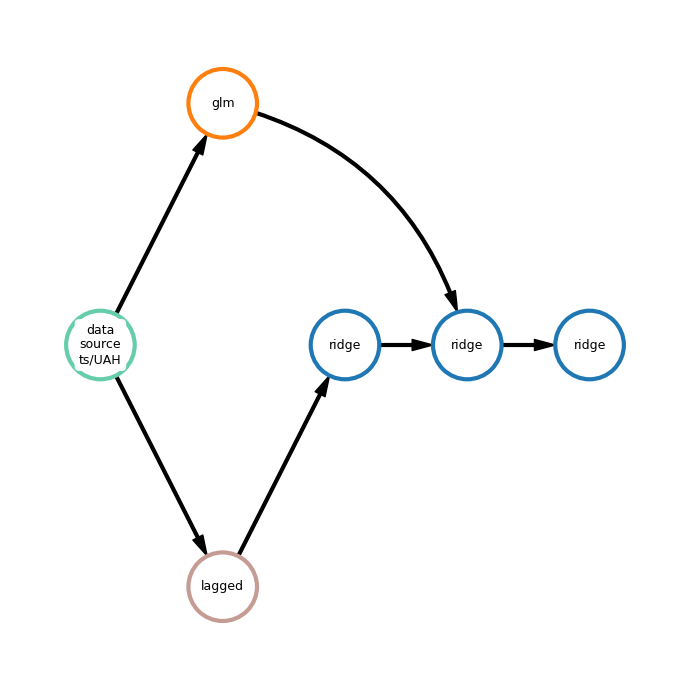

Pipeline structure:
{'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/UAH, ridge, lagged]}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/UAH - {}
ridge - {}
lagged - {'window_size': 10}
[0.59746254 0.5979211  0.59841515 0.5989969  0.59958812 0.60019441
 0.60079923 0.60139805 0.6019999  0.60259798]
{'mae': 0.004, 'mape': 0.007}


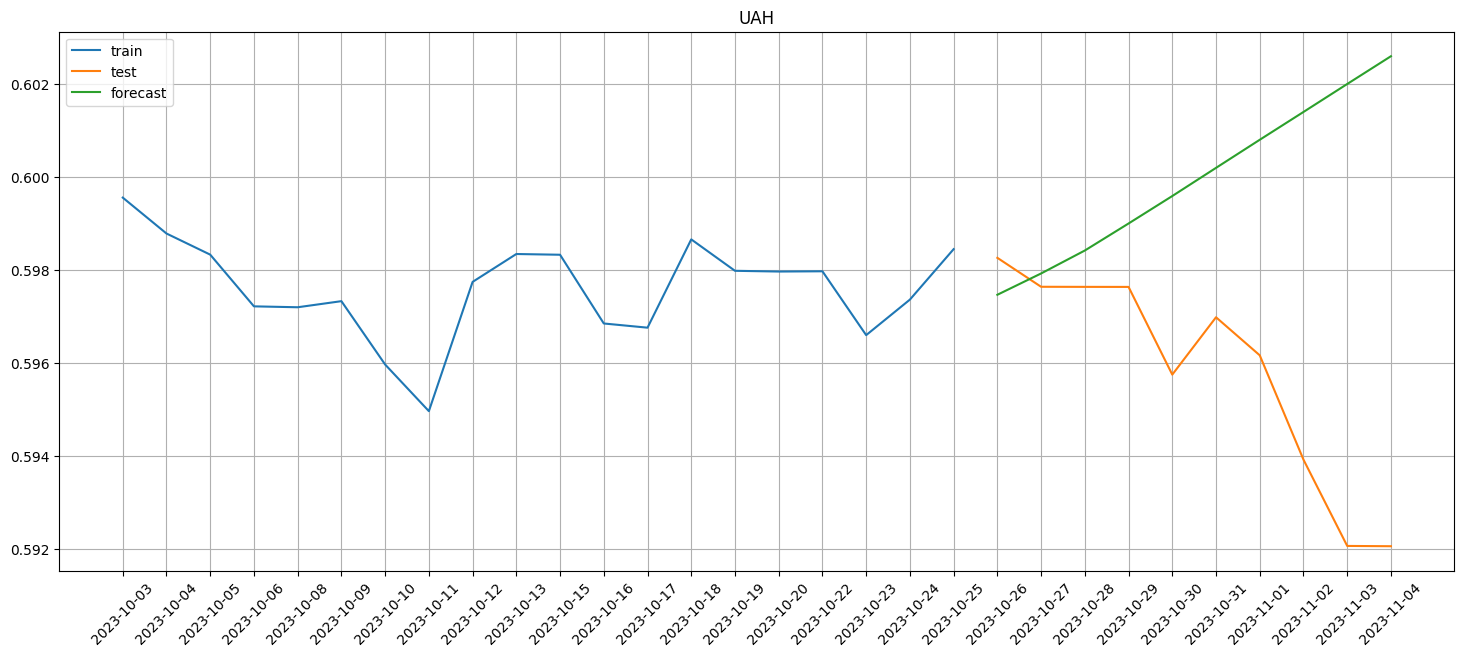


======================================== COP ========================================
2023-11-05 15:57:00,160 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.3 MiB, max: 3.7 MiB
2023-11-05 15:57:00,166 - ApiComposer - Initial pipeline was fitted in 16.5 sec.
2023-11-05 15:57:00,170 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-05 15:57:00,211 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 1 min. Set of candidate models: ['ar', 'cut', 'polyfit', 'ts_naive_average', 'diff_filter', 'locf', 'glm', 'ets', 'lagged', 'gaussian_filter', 'smoothing', 'sparse_lagged', 'ransac_lin_reg', 'normalization', 'ar', 'lasso', 'cut', 'linear', 'scaling', 'polyfit', 'gaussian_filter', 'locf', 'glm', 'lagged', 'diff_filter', 'ridge', 'pca', 'sgdr', 'ransac_non_lin_reg', 'dtreg', 'ts_naive_average', 'rfr', 'adareg', 'ets', 'sparse_lagged', 'smoothing'].
2023-11-05

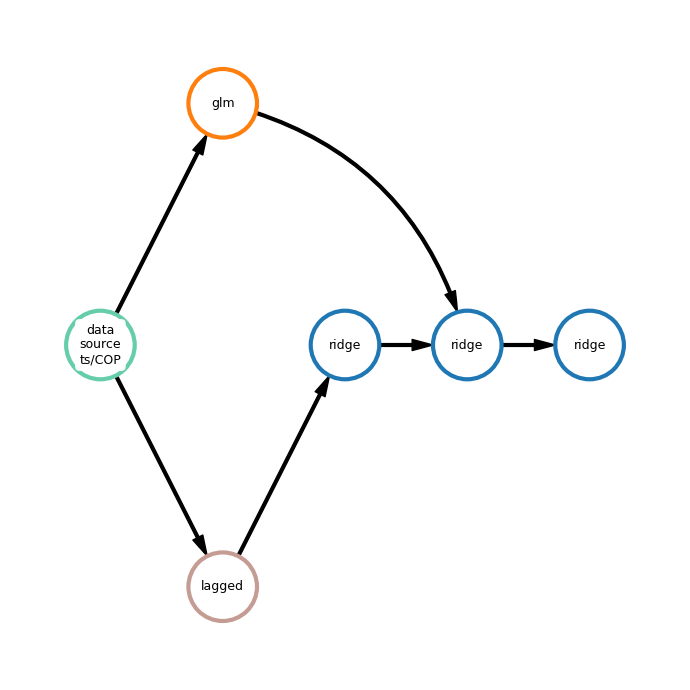

Pipeline structure:
{'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/COP, ridge, lagged]}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/COP - {}
ridge - {}
lagged - {'window_size': 10}
[0.00524676 0.00524638 0.00524602 0.00524565 0.0052453  0.00524497
 0.00524468 0.00524439 0.0052441  0.00524381]
{'mae': 0.0, 'mape': 0.021}


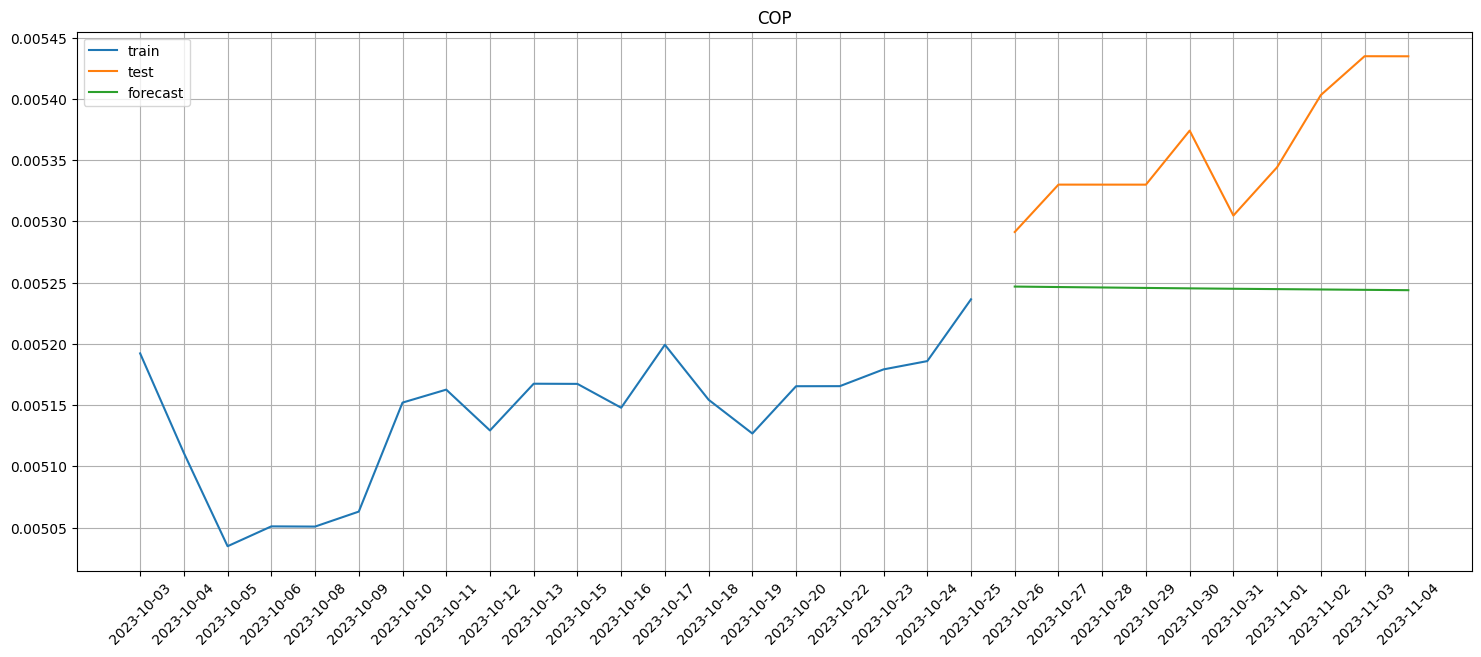

In [5]:
forecast_length = 10

start_time = time.time()

while True:
    
    print()
    
    elapsed_time = time.time() - start_time
    
    if elapsed_time > 10*60:
        break
    
    target_name = random.choice(abscur_data.columns)
    print('='*40, target_name, '='*40)
    
    # Сборка датасета
    
    target_train = np.ravel(abscur_data[target_name].values[:-forecast_length])
    target_test = np.ravel(abscur_data[target_name].values[-forecast_length:])

    idx_train = abscur_data.index[:-forecast_length]
    idx_test = abscur_data.index[-forecast_length:]
    
    historical_data_inp = {}

    inp_name = target_name
    history = np.ravel(abscur_data[inp_name].values)

    historical_data_inp[inp_name] = history[:-forecast_length]
            
    # Сборка модели
    
    fedot = Fedot(problem='ts_forecasting',
                  task_params=TsForecastingParams(forecast_length=forecast_length),
                  timeout=1)
    
    # Обучение модели
    
    fedot.fit(features=historical_data_inp,
              target=historical_data_inp[target_name])
    
    # Вид сети
    
    fedot.current_pipeline.show()
    
    fedot.current_pipeline.print_structure()
    
    # Предсказание
    
    forecast = fedot.predict(historical_data_inp,in_sample=False)
    print(forecast)
    
    # Расчет метрик
    
    print(fedot.get_metrics(target_test,metric_names=['mae','mape']))
    
    # График
    
    plt.plot(idx_train[-20:],target_train[-20:],label='train')
    plt.plot(idx_test,target_test,label='test')
    plt.plot(idx_test,forecast,label='forecast')
    plt.grid()
    plt.legend()
    plt.title(target_name)
    plt.xticks(rotation=45)
    plt.show()